In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread('/content/drive/MyDrive/FameClassiFy/model/test_images/test1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/FameClassiFy/model/test_images/test2.jpg')
img.shape


(568, 474, 3)

In [ ]:
img2.shape

(474, 474, 3)

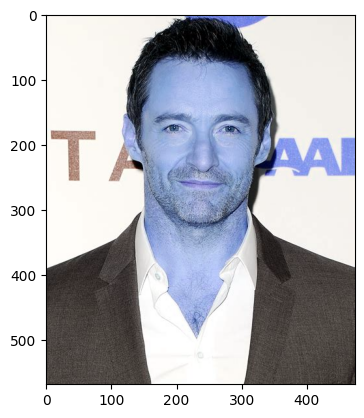

In [ ]:
plt.imshow(img)


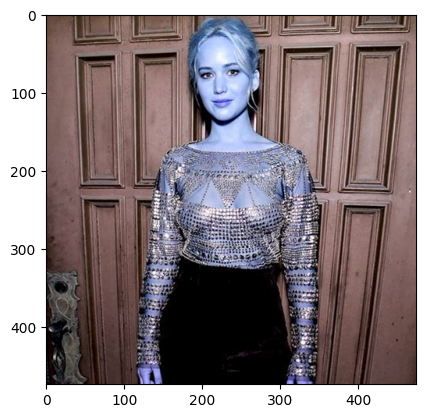

In [ ]:
plt.imshow(img2)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(568, 474)

In [ ]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray2.shape

(474, 474)

array([[254, 254, 253, ..., 242, 249, 249],
       [254, 254, 251, ..., 239, 245, 245],
       [253, 251, 248, ..., 235, 241, 241],
       ...,
       [ 82,  79,  80, ...,  61,  49,  52],
       [ 89,  78,  85, ...,  66,  75,  79],
       [ 91,  71,  88, ...,  54,  75,  80]], dtype=uint8)
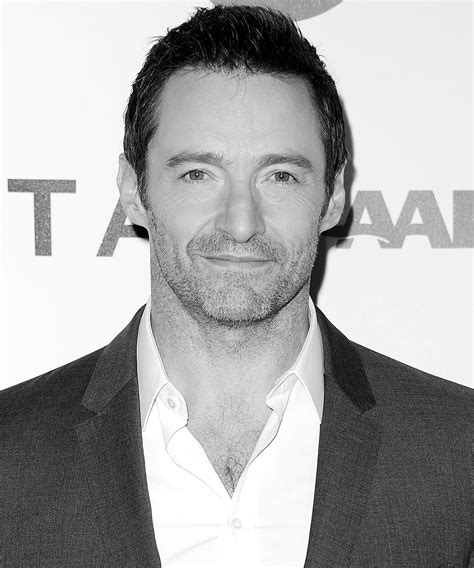

In [ ]:
gray


array([[ 72,  69,  70, ...,  96, 104, 104],
       [ 71,  68,  69, ...,  97, 104, 104],
       [ 69,  67,  68, ...,  98,  98,  98],
       ...,
       [  2,  10,  16, ...,  40,  38,  38],
       [ 63,   3,   5, ...,  42,  39,  72],
       [ 63,   3,   5, ...,  42,  39,  72]], dtype=uint8)
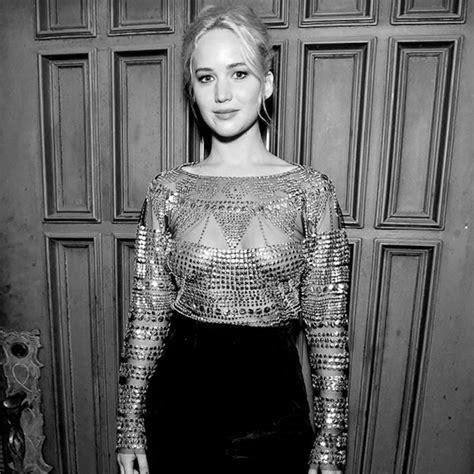

In [ ]:
gray2

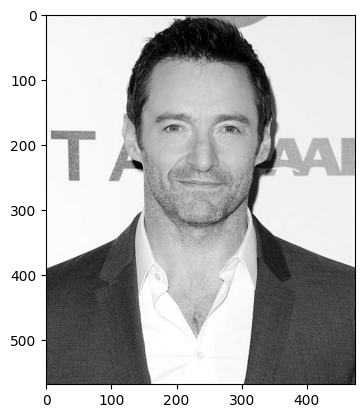

In [ ]:
plt.imshow(gray, cmap='gray')


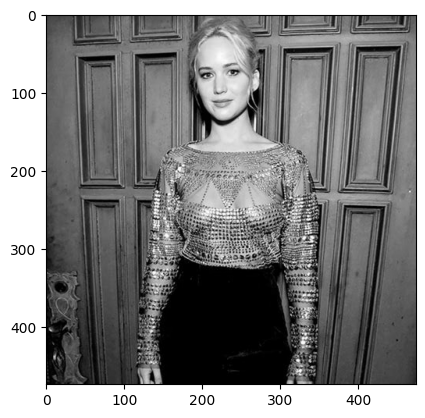

In [ ]:
plt.imshow(gray2, cmap='gray')

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces


array([[126,  84, 227, 227]], dtype=int32)

In [ ]:
faces2 = face_cascade.detectMultiScale(gray2, 1.3, 5)
faces2


array([[177,  39,  94,  94]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h


(np.int32(126), np.int32(84), np.int32(227), np.int32(227))

In [ ]:
(x2,y2,w2,h2) = faces2[0]
x2,y2,w2,h2

(np.int32(177), np.int32(39), np.int32(94), np.int32(94))

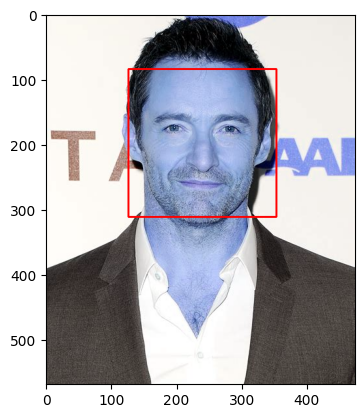

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

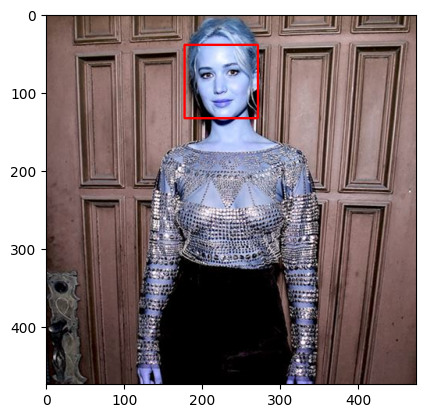

In [ ]:
face_img2 = cv2.rectangle(img2,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
plt.imshow(face_img2)

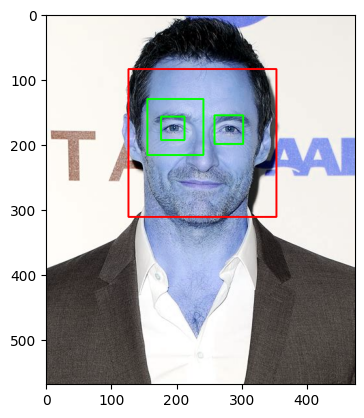

In [ ]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


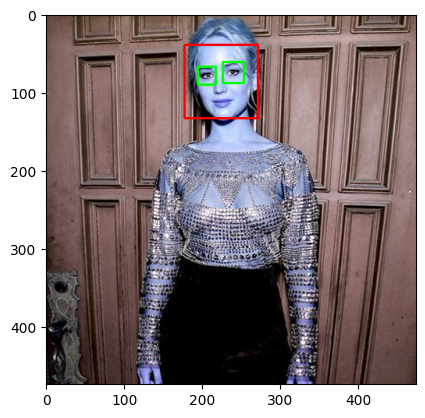

In [ ]:
for (x,y,w,h) in faces2:
    face_img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray2 = gray2[y:y+h, x:x+w]
    roi_color2 = face_img2[y:y+h, x:x+w]
    eyes2 = eye_cascade.detectMultiScale(roi_gray2)
    for (ex,ey,ew,eh) in eyes2:
        cv2.rectangle(roi_color2,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img2, cmap='gray')
plt.show()


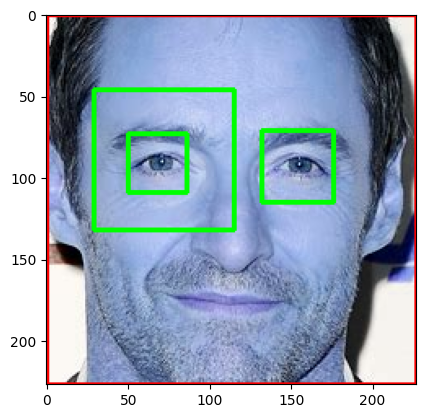

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

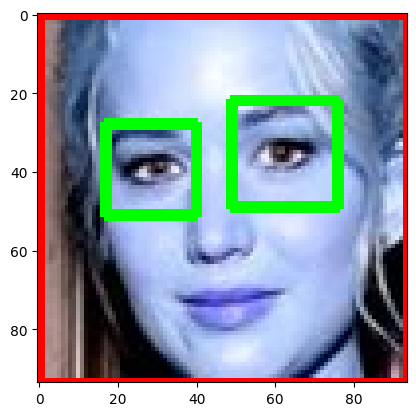

In [ ]:
%matplotlib inline
plt.imshow(roi_color2, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(227, 227, 3)

In [ ]:
cropped_img2 = np.array(roi_color2)
cropped_img2.shape

(94, 94, 3)

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

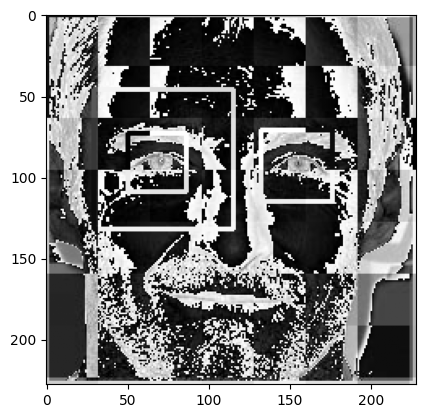

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

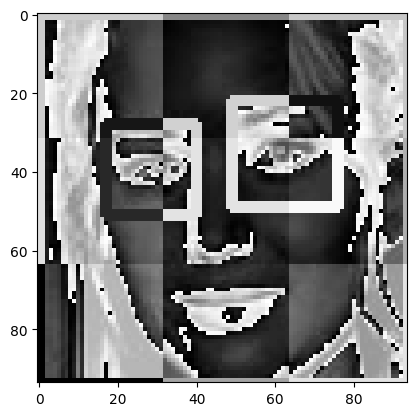

In [ ]:
im_har2 = w2d(cropped_img2,'db1',5)
plt.imshow(im_har2, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

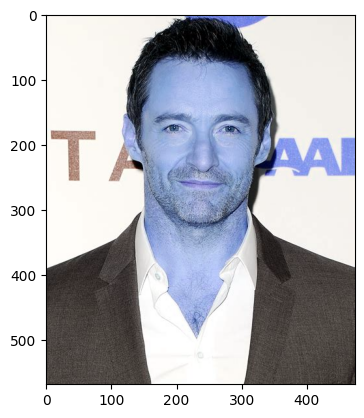

In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/FameClassiFy/model/test_images/test1.jpg')
plt.imshow(original_image)

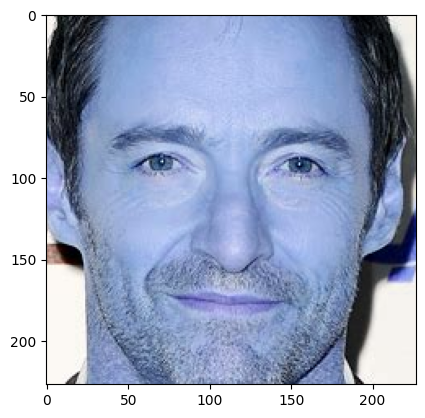

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/FameClassiFy/model/test_images/test1.jpg')
plt.imshow(cropped_image)

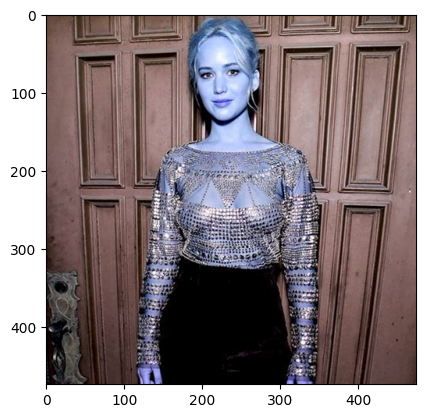

In [ ]:
original_image2 = cv2.imread('/content/drive/MyDrive/FameClassiFy/model/test_images/test2.jpg')
plt.imshow(original_image2)

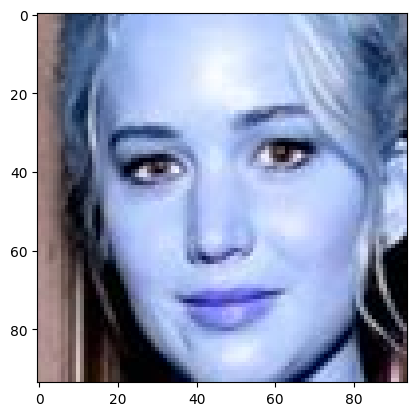

In [ ]:
cropped_image2 = get_cropped_image_if_2_eyes('/content/drive/MyDrive/FameClassiFy/model/test_images/test2.jpg')
plt.imshow(cropped_image2)

In [ ]:
path_to_data = "/content/drive/MyDrive/FameClassiFy/model/dataset"
path_to_cr_data = "/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Will Smith',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Scarlett Johansson',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Tom Cruise',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Megan Fox',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Kate Winslet',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Robert Downey Jr',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Leonardo DiCaprio',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Nicole Kidman',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Sandra Bullock',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Natalie Portman',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Johnny Depp',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Jennifer Lawrence',
 '/content/drive/MyDrive/FameClassiFy/model/dataset/Hugh Jackman',
 '/content/drive/MyDrive/FameClassiFy/model/dat

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  # Get celebrity name from directory name
    celebrity_file_names_dict[celebrity_name] = []

    # Iterate through the images in the directory
    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Processing image: {entry.path}")
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                # Create a folder for the celebrity if it doesn't exist
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")

                # Save the cropped image with a unique name
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)

                # Add the path of the cropped image to the dictionary
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

# Print the result
print("Cropped images processed and saved:")
for celebrity_name, files in celebrity_file_names_dict.items():
    print(f"{celebrity_name}: {len(files)} images saved.")

Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/008_74cd0628.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/005_dac94cfe.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/019_c332c45a.jpg
Generating cropped images in folder: /content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/007_ba0aa044.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/017_e4dd8745.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/014_ff388296.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/003_21d0aae6.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/018_b7231fad.jpg
Processing image: /content/drive/MyDrive/FameClassiFy/model/dataset/Tom Hanks/002_f6b26479.jpg
Processing image: /content/drive/MyDrive

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Tom Hanks': ['/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks1.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks2.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks3.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks4.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks5.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks6.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks7.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks8.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks9.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks10.png',
  '/content/drive/MyDrive/FameClassiFy/model/dataset/cropped/Tom Hanks/Tom Hanks11.png',
  '/content/drive

In [ ]:

cropped_base_path = path_to_cr_data

for celebrity_name in os.listdir(cropped_base_path):
    celebrity_folder = os.path.join(cropped_base_path, celebrity_name)
    if os.path.isdir(celebrity_folder):
        image_count = len([
            file for file in os.listdir(celebrity_folder)
            if file.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        print(f"{celebrity_name}: {image_count} images")


Tom Hanks: 64 images
Will Smith: 60 images
Scarlett Johansson: 168 images
Tom Cruise: 60 images
Megan Fox: 85 images
Kate Winslet: 83 images
Robert Downey Jr: 63 images
Leonardo DiCaprio: 86 images
Nicole Kidman: 88 images
Sandra Bullock: 82 images
Natalie Portman: 86 images
Johnny Depp: 56 images
Jennifer Lawrence: 93 images
Hugh Jackman: 70 images
Angelina Jolie: 87 images
Denzel Washington: 70 images
Brad Pitt: 75 images


In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Tom Hanks': 0,
 'Will Smith': 1,
 'Scarlett Johansson': 2,
 'Tom Cruise': 3,
 'Megan Fox': 4,
 'Kate Winslet': 5,
 'Robert Downey Jr': 6,
 'Leonardo DiCaprio': 7,
 'Nicole Kidman': 8,
 'Sandra Bullock': 9,
 'Natalie Portman': 10,
 'Johnny Depp': 11,
 'Jennifer Lawrence': 12,
 'Hugh Jackman': 13,
 'Angelina Jolie': 14,
 'Denzel Washington': 15,
 'Brad Pitt': 16}

In [ ]:
import random
X, y = [], []

# Step 1: Find the minimum number of images per class
min_images_per_class = min(len(files) for files in celebrity_file_names_dict.values())

# Step 2: Balance the dataset
for celebrity_name, training_files in celebrity_file_names_dict.items():
    selected_files = random.sample(training_files, min_images_per_class)  # Randomly select min count

    for training_image in selected_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))

        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))

        combined_img = np.vstack((
            scalled_raw_img.reshape(32*32*3, 1),
            scalled_img_har.reshape(32*32, 1)
        ))

        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
from collections import Counter

class_counts = Counter(y)

for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} samples")


Class 0: 56 samples
Class 1: 56 samples
Class 2: 56 samples
Class 3: 56 samples
Class 4: 56 samples
Class 5: 56 samples
Class 6: 56 samples
Class 7: 56 samples
Class 8: 56 samples
Class 9: 56 samples
Class 10: 56 samples
Class 11: 56 samples
Class 12: 56 samples
Class 13: 56 samples
Class 14: 56 samples
Class 15: 56 samples
Class 16: 56 samples


In [ ]:
len(X[0])

4096

In [ ]:
X[0]

array([[ 94],
       [110],
       [135],
       ...,
       [  0],
       [  0],
       [ 72]], dtype=uint8)

In [ ]:
y[0]

0

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(952, 4096)

Model Training


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6354166666666666

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.60      0.55         5
           2       0.71      0.83      0.77         6
           3       0.67      0.33      0.44         6
           4       1.00      0.83      0.91         6
           5       0.38      0.60      0.46         5
           6       0.71      0.83      0.77         6
           7       0.75      0.50      0.60         6
           8       0.50      0.50      0.50         6
           9       0.80      0.67      0.73         6
          10       0.43      0.50      0.46         6
          11       0.75      0.60      0.67         5
          12       0.60      0.50      0.55         6
          13       0.50      0.50      0.50         6
          14       0.57      0.80      0.67         5
          15       0.83      1.00      0.91         5
          16       0.67      0.67      0.67         6

    accuracy              

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

model_params = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'svc__C': [1, 10, 100],                # SVC model parameters
            'svc__kernel': ['linear', 'rbf'],
            'svc__gamma': ['scale', 'auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 50, 100],   # RandomForest model parameters
            'randomforestclassifier__max_depth': [None, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=300),
        'params': {
            'logisticregression__C': [1],                 # Logistic Regression model parameters
            'logisticregression__solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__max_depth': [5, 10, 20],       # DecisionTree model parameters
            'decisiontreeclassifier__criterion': ['gini', 'entropy']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [3, 5, 7],         # KNN model parameters
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    }
}


In [ ]:
import time
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}

start_time = time.time()

for i, (algo, mp) in enumerate(model_params.items()):
    print(f"Training {algo} model...")

    pipe = make_pipeline(StandardScaler(), mp['model'])

    clf = GridSearchCV(pipe, mp['params'], cv=5, n_jobs=-1, return_train_score=False)

    model_start_time = time.time()
    clf.fit(X_train, y_train)

    model_end_time = time.time()
    model_duration = model_end_time - model_start_time

    print(f"{algo} model training completed in {model_duration:.2f} seconds.")

    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    best_estimators[algo] = clf.best_estimator_

    time_per_model = model_duration
    remaining_models = len(model_params) - (i + 1)
    estimated_time_remaining = time_per_model * remaining_models

    print(f"Estimated time remaining: {estimated_time_remaining/60:.2f} minutes.")

end_time = time.time()
total_duration = end_time - start_time

print(f"Total training time: {total_duration / 60:.2f} minutes.")

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)


Training SVM model...
SVM model training completed in 514.74 seconds.
Estimated time remaining: 34.32 minutes.
Training Random Forest model...
Random Forest model training completed in 66.98 seconds.
Estimated time remaining: 3.35 minutes.
Training Logistic Regression model...
Logistic Regression model training completed in 197.84 seconds.
Estimated time remaining: 6.59 minutes.
Training Decision Tree model...
Decision Tree model training completed in 110.58 seconds.
Estimated time remaining: 1.84 minutes.
Training KNN model...
KNN model training completed in 2.71 seconds.
Estimated time remaining: 0.00 minutes.
Total training time: 14.88 minutes.
                 model  best_score  \
0                  SVM    0.570094   
1        Random Forest    0.399544   
2  Logistic Regression    0.591119   
3        Decision Tree    0.220808   
4                  KNN    0.363341   

                                         best_params  
0  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...  
1  {'

In [ ]:
best_estimators

{'SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, kernel='linear', probability=True))]),
 'Random Forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'Logistic Regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, max_iter=300, solver='liblinear'))]),
 'Decision Tree': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(max_depth=20))]),
 'KNN': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier',
                  KNeighborsClassifier(n_neighbors=3, weights='distance'))])}

In [ ]:
best_estimators['SVM'].score(X_test,y_test)

0.6666666666666666

In [ ]:
best_estimators['Random Forest'].score(X_test,y_test)

0.40625

In [ ]:
best_estimators['Logistic Regression'].score(X_test,y_test)

0.6354166666666666

In [ ]:
best_estimators['Decision Tree'].score(X_test,y_test)

0.21875

In [ ]:
best_estimators['KNN'].score(X_test,y_test)

0.4166666666666667

In [ ]:
best_clf = best_estimators['SVM']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(95.72222222222221, 0.5, 'Truth')

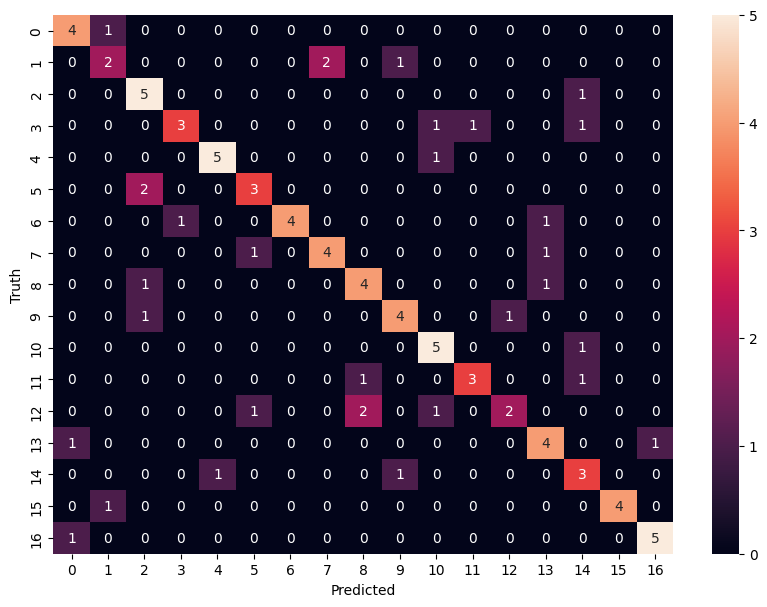

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Tom Hanks': 0,
 'Will Smith': 1,
 'Scarlett Johansson': 2,
 'Tom Cruise': 3,
 'Megan Fox': 4,
 'Kate Winslet': 5,
 'Robert Downey Jr': 6,
 'Leonardo DiCaprio': 7,
 'Nicole Kidman': 8,
 'Sandra Bullock': 9,
 'Natalie Portman': 10,
 'Johnny Depp': 11,
 'Jennifer Lawrence': 12,
 'Hugh Jackman': 13,
 'Angelina Jolie': 14,
 'Denzel Washington': 15,
 'Brad Pitt': 16}

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
!ls


class_dictionary.json  drive  sample_data  saved_model.pkl


In [ ]:
import shutil
import os
shutil.move('saved_model.pkl', '/content/drive/MyDrive/FameClassiFy/model/saved_model.pkl')


'/content/drive/MyDrive/FameClassiFy/model/saved_model.pkl'

In [ ]:
import shutil
import os
shutil.move('class_dictionary.json', '/content/drive/MyDrive/FameClassiFy/model/class_dictionary.json')


'/content/drive/MyDrive/FameClassiFy/model/class_dictionary.json'